In [1]:
#cargar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor
%matplotlib inline

In [20]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
from joblib import dump, load

#RL_model = load('model_RL_27-06-2021.joblib') ---> MEJOR MODELO ENTRENADO HASTA AHORA
RL_model = load('model_RL_07-09-2021.joblib') # Se carga el último modelo entrenado

In [4]:
# VALORES EXACTOS DEL MODELO COMPLETO:
import numpy as np

cp = 4184.1
p = 998.20
k = 0.6034
mi_h2o = 29.4 

mi_h2o_50 = 45.08 # 1.96 x 23
mi_h2o_25 = 13.72 # 1.96 x 7
mi_h2o_DW = 1.96

values_exacts50 = [cp, p, k, mi_h2o_50]
values_exacts25 = [cp, p, k, mi_h2o_25]
values_exactsDW = [cp, p, k, mi_h2o_DW]

values_exacts50 = np.array(values_exacts50)
values_exacts25 = np.array(values_exacts25)
values_exactsDW = np.array(values_exactsDW)

values_exactst = np.vstack((values_exacts50,values_exacts25,values_exactsDW))
# values_exactst=np.array(values_exacts)
# #vec_exact.reshape(-1,1)
print(values_exactst)
print(type(values_exactst))

[[4.1841e+03 9.9820e+02 6.0340e-01 4.5080e+01]
 [4.1841e+03 9.9820e+02 6.0340e-01 1.3720e+01]
 [4.1841e+03 9.9820e+02 6.0340e-01 1.9600e+00]]
<class 'numpy.ndarray'>


In [5]:
values_exactst.reshape(1, -1) # --> Solución del error que sale al solo realizar (1) predicción, era reajustar... 
#la estrucutura de los datos // Reshape: Da una nueva forma a una matriz sin cambiar sus datos.

array([[4.1841e+03, 9.9820e+02, 6.0340e-01, 4.5080e+01, 4.1841e+03,
        9.9820e+02, 6.0340e-01, 1.3720e+01, 4.1841e+03, 9.9820e+02,
        6.0340e-01, 1.9600e+00]])

In [6]:
#test
start = time.time() # Iniciar medida del tiempo
y_pred_exact = RL_model.predict(values_exactst) # values_exactst.reshape(1, -1): se usa esto cuando solo sea una muestra
# score_test_new = RL_model.score(new_X, new_Y) # Probar el score con: y_pred_new (100%) y new_Y
end = time.time() # Tomar el tiempo final
total = end - start
print('Tiempo total validación: ' + str(total) + ' segundos')
# print('Score test: %f' % score_test_new,"\n")
y_pred_exact

Tiempo total validación: 0.028431177139282227 segundos


array([[297.95012801, 298.02073999, 298.08713982, 298.15007837,
        298.21042303, 298.26809607, 298.32305221, 298.37657094,
        298.42829672, 298.47806945, 298.52588957, 298.57175512,
        298.61566343, 298.65928306, 298.70219831, 298.74383613,
        298.7842009 , 298.82329373, 298.86110944, 298.89765115,
        298.93291816, 298.96691187, 298.9998876 , 299.0339135 ,
        299.06712804, 299.09955269, 299.13117996, 299.16199897,
        299.19202758, 299.22125338, 299.24968188, 299.27731365,
        299.30494022, 299.33275519, 299.36007922, 299.38691063,
        299.41325077, 299.43910049, 299.464456  , 299.48931925,
        299.51369228, 299.53757674, 299.56160422, 299.58533109,
        299.60870056, 299.6317077 , 299.65436215, 299.67665522,
        299.69858576, 299.72016218, 299.74138346, 299.76233617,
        299.78319539, 299.80376374, 299.82403651, 299.84401516,
        299.86369572, 299.88308886, 299.90218469, 299.92098553,
        299.93949173, 299.95790889, 299.

In [7]:
# Tiempo promedio que dura predecir una (1) muestra con el modelo RL (Regresión Lineal):
Tiempo_pred_modelo_RL = [0.0012273788452148438, 0.0005586147308349609, 0.005948066711425781, 0.0010023117065429688,
                         0.0009965896606445312]
Prom_Tiempo_pred_modelo_RL = sum(Tiempo_pred_modelo_RL) / len(Tiempo_pred_modelo_RL)

# Tiempo promedio por simulación del modelo completo: :
Tiempo_modelo_completo = [1615.749100,1549.457378,1517.998715,1445.440041,1459.058052]
Prom_Tiempo_modelo_completo = sum(Tiempo_modelo_completo) / len(Tiempo_modelo_completo)

print('Linear Regression Model')
print('Segundos: ',Prom_Tiempo_pred_modelo_RL)
print('Minutos: ',Prom_Tiempo_pred_modelo_RL/60,"\n")

print('Complete Model')
print('Segundos: ',Prom_Tiempo_modelo_completo)
print('Minutos: ',Prom_Tiempo_modelo_completo/60)

Linear Regression Model
Segundos:  0.0019465923309326173
Minutos:  3.2443205515543623e-05 

Complete Model
Segundos:  1517.5406572
Minutos:  25.292344286666665


In [8]:
#Se cargan datos de simulacion con los valores exactos en Comsol with Matlab. Mi_H2O = 29.4
dataSimulacionValExact = np.loadtxt('Datasets\BBDD_Extra__Exact_.txt',delimiter=',')

#Se cargan datos de simulacion con los valores exactos en Comsol with Matlab. Mi_H2O = 45.08
dataSimulacionValExact50 = np.loadtxt('Datasets\BBDD_data_wt_Nanofluid_50.txt',delimiter=',')
#Se cargan datos de simulacion con los valores exactos en Comsol with Matlab. Mi_H2O = 13.72
dataSimulacionValExact25 = np.loadtxt('Datasets\BBDD_data_wt_Nanofluid_25.txt',delimiter=',')
#Se cargan datos de simulacion con los valores exactos en Comsol with Matlab. Mi_H2O = 1.96
dataSimulacionValExactDW = np.loadtxt('Datasets\BBDD_data_wt_Nanofluid_DW.txt',delimiter=',')


# Variables de entrada:
XExact = dataSimulacionValExact[:4]

XExact50 = dataSimulacionValExact50[:4]
XExact25 = dataSimulacionValExact25[:4]
XExactDW = dataSimulacionValExactDW[:4]

# Temperatura de salida:
YExact = dataSimulacionValExact[4:101]

YExact50 = dataSimulacionValExact50[4:101]
YExact25 = dataSimulacionValExact25[4:101]
YExactDW = dataSimulacionValExactDW[4:101]

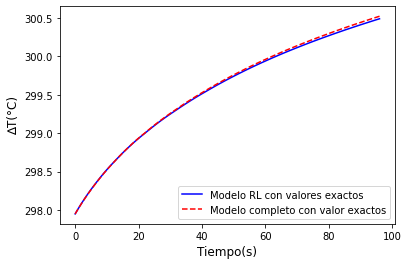

In [9]:
#fig, ax = plt.subplots()
plt.plot(y_pred_exact[0],"b",label = "Modelo RL con valores exactos") # y_pred_exact.reshape(-1,1): se usa esto cuando solo sea una muestra
plt.plot(YExact50,"r--",label = "Modelo completo con valor exactos") # YExact.reshape(-1,1): se usa esto cuando solo sea una muestra
plt.legend(loc = "lower right")
#plt.title("Modelo de regresión lineal", fontsize=14) 
plt.xlabel("Tiempo(s)", fontsize=12) 
plt.ylabel("∆T(°C)", fontsize=12)
#plt.show()
plt.savefig('endimage.png',bbox_inches='tight')

In [10]:
print(YExact50.shape)
print(YExact25.shape)
print(YExactDW.shape)
print(y_pred_exact.shape)
# print(y_pred_exact.reshape(-1,1).shape) # Así cambia cuando se usa reshape

(97,)
(97,)
(97,)
(3, 97)


In [11]:
# CORRELACIÓN ENTRE MODELO DE REGRESION Y MODELO COMPLETO:
# np.corrcoef(YExact,y_pred_exact) # ------> NO FUNCIONA BIEN ESTA FUNCIÓN PARA SACAR LA CORRELACIÓN. SE USA LA FORMULA DE EXCEL

In [12]:
# x=299.60-273.5-24.5
# x

In [13]:
# Temperatura incial(COMSOL)= 297.95
DTPE = y_pred_exact - 297.95
DTPE

array([[ 1.28008167e-04,  7.07399891e-02,  1.37139822e-01,
         2.00078367e-01,  2.60423034e-01,  3.18096065e-01,
         3.73052211e-01,  4.26570942e-01,  4.78296716e-01,
         5.28069450e-01,  5.75889570e-01,  6.21755121e-01,
         6.65663429e-01,  7.09283058e-01,  7.52198310e-01,
         7.93836133e-01,  8.34200899e-01,  8.73293726e-01,
         9.11109441e-01,  9.47651149e-01,  9.82918157e-01,
         1.01691187e+00,  1.04988760e+00,  1.08391350e+00,
         1.11712804e+00,  1.14955269e+00,  1.18117996e+00,
         1.21199897e+00,  1.24202758e+00,  1.27125338e+00,
         1.29968188e+00,  1.32731365e+00,  1.35494022e+00,
         1.38275519e+00,  1.41007922e+00,  1.43691063e+00,
         1.46325077e+00,  1.48910049e+00,  1.51445600e+00,
         1.53931925e+00,  1.56369228e+00,  1.58757674e+00,
         1.61160422e+00,  1.63533109e+00,  1.65870056e+00,
         1.68170770e+00,  1.70436215e+00,  1.72665522e+00,
         1.74858576e+00,  1.77016218e+00,  1.79138346e+0

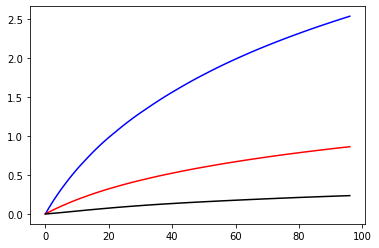

In [14]:
plt.plot(DTPE[0],"b") # DTPE.reshape(-1,1): se usa esto cuando solo sea una muestra
plt.plot(DTPE[1],"r")
plt.plot(DTPE[2],"k")

In [15]:
import pandas as pd
df = pd.DataFrame(DTPE.T) # DTPE.reshape(-1,1)
df.to_excel('DTPE.xlsx')

In [16]:
Y_Exact_values_Comsol = np.vstack((YExact50,YExact25,YExactDW))
Y_Exact_values_Comsol

array([[297.9501, 298.0195, 298.0851, 298.1476, 298.2076, 298.2651,
        298.3201, 298.3737, 298.4255, 298.4756, 298.5237, 298.57  ,
        298.6144, 298.6585, 298.7018, 298.7439, 298.7848, 298.8244,
        298.8628, 298.8999, 298.9358, 298.9704, 299.004 , 299.0386,
        299.0724, 299.1053, 299.1375, 299.1689, 299.1995, 299.2293,
        299.2583, 299.2865, 299.3146, 299.3429, 299.3708, 299.3981,
        299.4249, 299.4512, 299.477 , 299.5023, 299.5271, 299.5514,
        299.5759, 299.6   , 299.6238, 299.6472, 299.6703, 299.6929,
        299.7152, 299.7372, 299.7588, 299.7801, 299.8013, 299.8223,
        299.8429, 299.8632, 299.8833, 299.903 , 299.9225, 299.9416,
        299.9605, 299.9793, 299.9979, 300.0162, 300.0344, 300.0523,
        300.0699, 300.0873, 300.1045, 300.1215, 300.1382, 300.1549,
        300.1715, 300.1878, 300.204 , 300.22  , 300.2358, 300.2514,
        300.2668, 300.282 , 300.2972, 300.3123, 300.3272, 300.342 ,
        300.3566, 300.3711, 300.3854, 300.3996, 

In [17]:
# Temperatura incial(COMSOL)= 297.95
DTPE_Exact_Comsol = Y_Exact_values_Comsol - 297.95
DTPE_Exact_Comsol

array([[1.0000e-04, 6.9500e-02, 1.3510e-01, 1.9760e-01, 2.5760e-01,
        3.1510e-01, 3.7010e-01, 4.2370e-01, 4.7550e-01, 5.2560e-01,
        5.7370e-01, 6.2000e-01, 6.6440e-01, 7.0850e-01, 7.5180e-01,
        7.9390e-01, 8.3480e-01, 8.7440e-01, 9.1280e-01, 9.4990e-01,
        9.8580e-01, 1.0204e+00, 1.0540e+00, 1.0886e+00, 1.1224e+00,
        1.1553e+00, 1.1875e+00, 1.2189e+00, 1.2495e+00, 1.2793e+00,
        1.3083e+00, 1.3365e+00, 1.3646e+00, 1.3929e+00, 1.4208e+00,
        1.4481e+00, 1.4749e+00, 1.5012e+00, 1.5270e+00, 1.5523e+00,
        1.5771e+00, 1.6014e+00, 1.6259e+00, 1.6500e+00, 1.6738e+00,
        1.6972e+00, 1.7203e+00, 1.7429e+00, 1.7652e+00, 1.7872e+00,
        1.8088e+00, 1.8301e+00, 1.8513e+00, 1.8723e+00, 1.8929e+00,
        1.9132e+00, 1.9333e+00, 1.9530e+00, 1.9725e+00, 1.9916e+00,
        2.0105e+00, 2.0293e+00, 2.0479e+00, 2.0662e+00, 2.0844e+00,
        2.1023e+00, 2.1199e+00, 2.1373e+00, 2.1545e+00, 2.1715e+00,
        2.1882e+00, 2.2049e+00, 2.2215e+00, 2.23

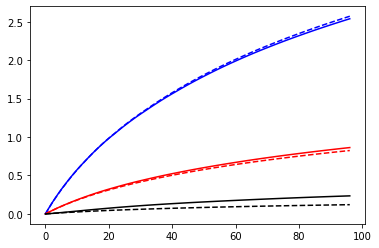

In [18]:
plt.plot(DTPE[0],"b") # DTPE.reshape(-1,1): se usa esto cuando solo sea una muestra
plt.plot(DTPE_Exact_Comsol[0],"--b")

plt.plot(DTPE[1],"r")
plt.plot(DTPE_Exact_Comsol[1],"--r")

plt.plot(DTPE[2],"k")
plt.plot(DTPE_Exact_Comsol[2],"--k")

In [19]:
print('Temp max with mi_h2o in RL Model = 45.08: ', DTPE[0].max())
print('Temp max with mi_h2o in RL Model = 13.72: ', DTPE[1].max())
print('Temp max with mi_h2o in RL Model = 1.96: ', DTPE[2].max())

Temp max with mi_h2o in RL Model = 45.08:  2.539262416330871
Temp max with mi_h2o in RL Model = 13.72:  0.8632908574401199
Temp max with mi_h2o in RL Model = 1.96:  0.23480152285611666


In [20]:
print('Temp max with mi_h2o in Comsol = 45.08: ', DTPE_Exact_Comsol[0].max())
print('Temp max with mi_h2o in Comsol = 13.72: ', DTPE_Exact_Comsol[1].max())
print('Temp max with mi_h2o in Comsol = 1.96: ', DTPE_Exact_Comsol[2].max())

Temp max with mi_h2o in Comsol = 45.08:  2.571900000000028
Temp max with mi_h2o in Comsol = 13.72:  0.8248000000000388
Temp max with mi_h2o in Comsol = 1.96:  0.12020000000001119


In [21]:
import pandas as pd
df_exact = pd.DataFrame(DTPE_Exact_Comsol.T) # DTPE.reshape(-1,1)
df_exact.to_excel('DTPE Exact Comsol.xlsx')

In [22]:
score_test = RL_model.score(values_exactst, Y_Exact_values_Comsol)
print('Score test: %f' % score_test)

Score test: 0.994047


# CODE DESIGNED FOR A SINGLE PREDICTION

In [23]:
#cargar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor
%matplotlib inline

In [24]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [25]:
from joblib import dump, load

#RL_model = load('model_RL_27-06-2021.joblib') ---> MEJOR MODELO ENTRENADO HASTA AHORA
RL_model = load('model_RL_07-09-2021.joblib') # Se carga el último modelo entrenado

In [26]:
cp = 4184.1
p = 998.20
k = 0.6034
mi_h2o = 29.4 

X_values_exacts = [cp, p, k, mi_h2o]
X_values_exacts = np.array(X_values_exacts)
# values_exactst=np.array(values_exacts)
# #vec_exact.reshape(-1,1)
print(X_values_exacts)
print(type(X_values_exacts))


[4.1841e+03 9.9820e+02 6.0340e-01 2.9400e+01]
<class 'numpy.ndarray'>


In [27]:
#test
start = time.time() # Iniciar medida del tiempo
Y_pred_exacts = RL_model.predict(X_values_exacts.reshape(1,-1)) # values_exactst.reshape(1, -1): se usa esto cuando solo sea una muestra
# score_test_new = RL_model.score(new_X, new_Y) # Probar el score con: y_pred_new (100%) y new_Y
end = time.time() # Tomar el tiempo final
total = end - start
print('Tiempo total validación: ' + str(total) + ' segundos')
# print('Score test: %f' % score_test_new,"\n")
Y_pred_exacts

Tiempo total validación: 0.0 segundos


array([[297.95007865, 297.99604028, 298.0395209 , 298.08089109,
        298.12064312, 298.15872912, 298.19512226, 298.23059401,
        298.26492798, 298.2980282 , 298.32989479, 298.3605316 ,
        298.38992916, 298.4191014 , 298.44778885, 298.47565123,
        298.50269106, 298.52891129, 298.55429906, 298.57887425,
        298.60261453, 298.62553696, 298.64779316, 298.67066558,
        298.69299945, 298.7148149 , 298.73610251, 298.7568498 ,
        298.77707362, 298.79676944, 298.81593326, 298.83457188,
        298.85318741, 298.87190818, 298.89029128, 298.90834631,
        298.92606449, 298.9434511 , 298.9605049 , 298.97722413,
        298.99361613, 299.00967114, 299.02582885, 299.04178347,
        299.0574973 , 299.07296556, 299.08819478, 299.10318088,
        299.11792021, 299.13242085, 299.1466832 , 299.16076442,
        299.17480261, 299.18864316, 299.20228691, 299.21573408,
        299.22898526, 299.24204321, 299.2549036 , 299.26757156,
        299.28004249, 299.29245306, 299.

In [28]:
print(X_values_exacts.shape)
print(Y_pred_exacts.shape)

(4,)
(1, 97)


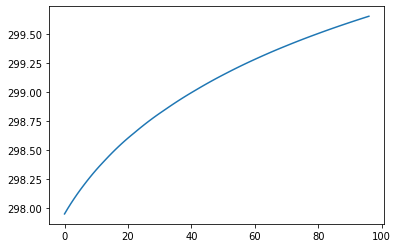

In [29]:
plt.plot(Y_pred_exacts.reshape(-1,1))

# EXPERIMENTAL DATA VS COMPLETE MODEL VS LINEAR REGRESSION MODEL

In [30]:
#Se cargan los datos experimentales:
Exp_Data = np.loadtxt('DTPE\Experimental_Data.txt',delimiter=',')
Exp_Data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.99000000e+02, 2.52261360e-02, 1.67151450e-02, 1.58408828e-01],
       [5.94000000e+02, 8.78676820e-02, 1.67151450e-02, 1.24485130e-01],
       [5.89000000e+02, 1.10636746e-01, 6.12759440e-02, 1.01863004e-01],
       [5.84000000e+02, 1.95974839e-01, 6.12759440e-02, 7.92358120e-02],
       [6.12000000e+02, 2.41458897e-01, 6.12759440e-02, 6.79203160e-02],
       [6.06000000e+02, 2.81240589e-01, 8.35490780e-02, 2.83060950e-02],
       [6.01000000e+02, 3.15326673e-01, 1.44775253e-01, 6.22620930e-02],
       [5.96000000e+02, 3.60756842e-01, 1.50339457e-01, 9.62066810e-02],
       [5.90000000e+02, 4.45883227e-01, 1.83718339e-01, 1.01863004e-01],
       [5.85000000e+02, 4.28863702e-01, 2.28206626e-01, 1.41448402e-01],
       [6.14000000e+02, 4.34537196e-01, 2.67118062e-01, 1.07519010e-01],
       [6.09000000e+02, 4.91254584e-01, 2.72675634e-01, 1.13174700e-01],
       [6.04000000e+02, 5.47940088e-01, 2.83789877e

In [31]:
# 0.050% wt Nanofluid ---> DTPE[0] // DTPE_Exact_Comsol[0] // Exp_Data[:,1]
# 0.025% wt Nanofluid ---> DTPE[1] // DTPE_Exact_Comsol[1] // Exp_Data[:,2]
# Distilled Water ---> DTPE[2] // DTPE_Exact_Comsol[2] // Exp_Data [:,3]

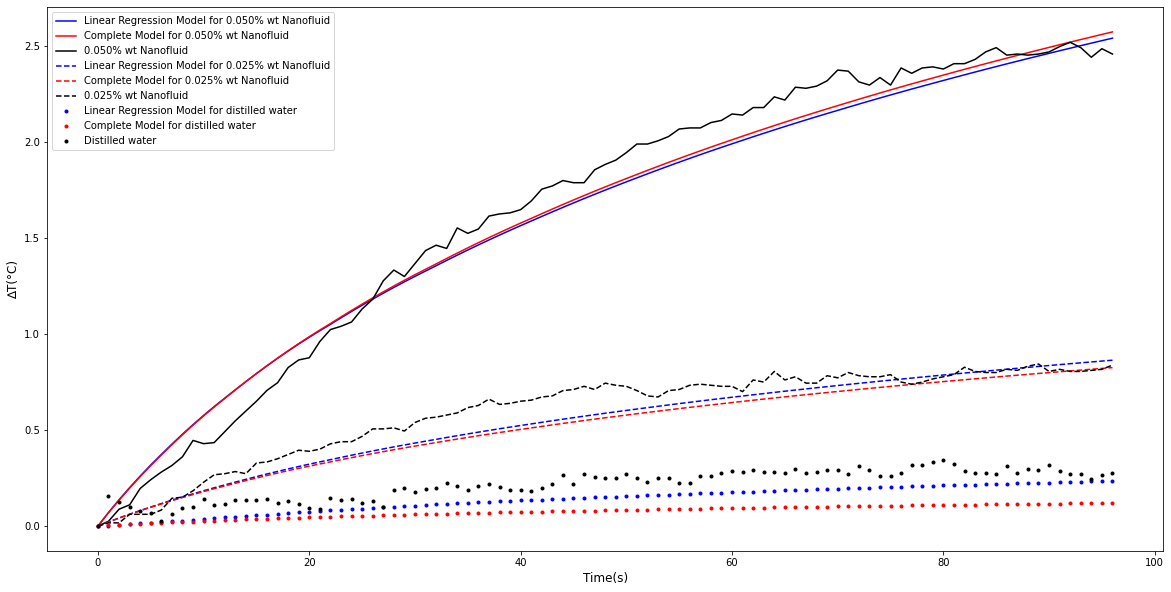

In [32]:
#fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))

# 0.050% wt Nanofluid
plt.plot(DTPE[0],"b",label = "Linear Regression Model for 0.050% wt Nanofluid") 
plt.plot(DTPE_Exact_Comsol[0],"r",label = "Complete Model for 0.050% wt Nanofluid") 
plt.plot(Exp_Data[:,1].reshape(-1,1),"k",label = "0.050% wt Nanofluid") 

# 0.025% wt Nanofluid
plt.plot(DTPE[1],"--b",label = "Linear Regression Model for 0.025% wt Nanofluid") 
plt.plot(DTPE_Exact_Comsol[1],"--r",label = "Complete Model for 0.025% wt Nanofluid") 
plt.plot(Exp_Data[:,2].reshape(-1,1),"--k",label = "0.025% wt Nanofluid") 

# Distilled Water
plt.plot(DTPE[2],".b",label = "Linear Regression Model for distilled water") 
plt.plot(DTPE_Exact_Comsol[2],".r",label = "Complete Model for distilled water") 
plt.plot(Exp_Data[:,3].reshape(-1,1),".k",label = "Distilled water") 


plt.legend(loc = "best")
#plt.title("Modelo de regresión lineal", fontsize=14) 
plt.xlabel("Time(s)", fontsize=12) 
plt.ylabel("∆T(°C)", fontsize=12)
#plt.show()
plt.savefig('expvsRLvscm.png',bbox_inches='tight')

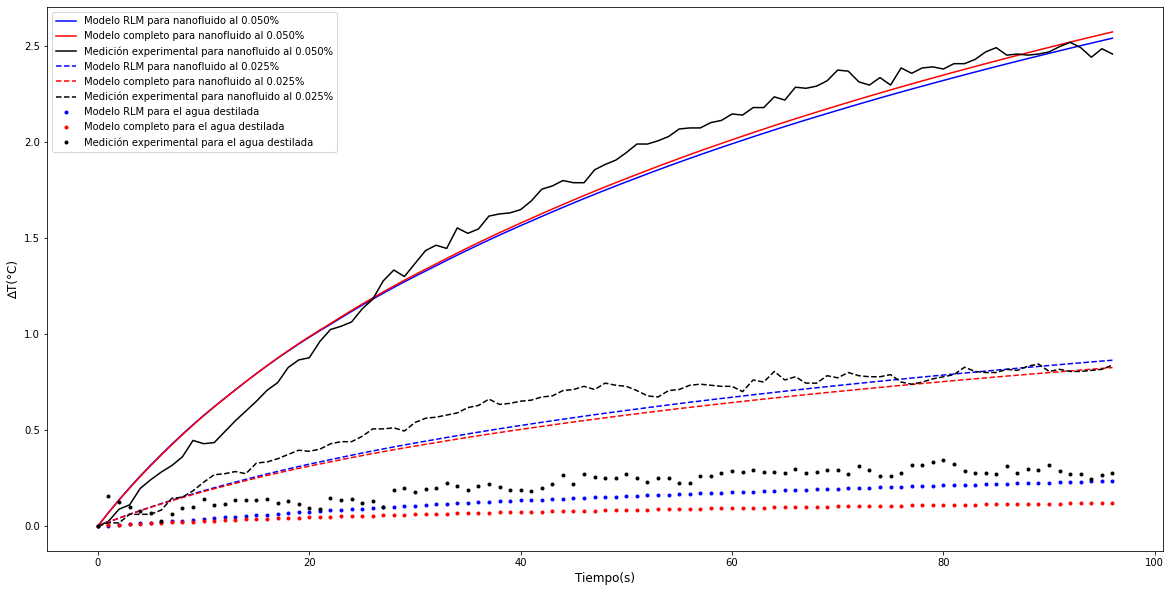

In [33]:
#fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))

# 0.050% wt Nanofluid
plt.plot(DTPE[0],"b",label = "Modelo RLM para nanofluido al 0.050%") 
plt.plot(DTPE_Exact_Comsol[0],"r",label = "Modelo completo para nanofluido al 0.050%") 
plt.plot(Exp_Data[:,1].reshape(-1,1),"k",label = "Medición experimental para nanofluido al 0.050%") 

# 0.025% wt Nanofluid
plt.plot(DTPE[1],"--b",label = "Modelo RLM para nanofluido al 0.025%") 
plt.plot(DTPE_Exact_Comsol[1],"--r",label = "Modelo completo para nanofluido al 0.025%") 
plt.plot(Exp_Data[:,2].reshape(-1,1),"--k",label = "Medición experimental para nanofluido al 0.025%") 

# Distilled Water
plt.plot(DTPE[2],".b",label = "Modelo RLM para el agua destilada") 
plt.plot(DTPE_Exact_Comsol[2],".r",label = "Modelo completo para el agua destilada") 
plt.plot(Exp_Data[:,3].reshape(-1,1),".k",label = "Medición experimental para el agua destilada") 


plt.legend(loc = "best")
#plt.title("Modelo de regresión lineal", fontsize=14) 
plt.xlabel("Tiempo(s)", fontsize=12) 
plt.ylabel("∆T(°C)", fontsize=12)
#plt.show()
plt.savefig('expvsRLvscmES.png',bbox_inches='tight')

In [2]:
data1 = np.loadtxt('Datasets\BBDD_1_to_15.txt',delimiter=',')
data2 = np.loadtxt('Datasets\BBDD_16_to_30.txt',delimiter=',')
data3 = np.loadtxt('Datasets\BBDD_31_to_45.txt',delimiter=',')
data4 = np.loadtxt('Datasets\BBDD_46_to_50.txt',delimiter=',')
data5 = np.loadtxt('Datasets\BBDD_51_to_70.txt',delimiter=',')
data6 = np.loadtxt('Datasets\BBDD_71_to_100.txt',delimiter=',')
data7 = np.loadtxt('Datasets\BBDD_101_to_115.txt',delimiter=',')
data8 = np.loadtxt('Datasets\BBDD_116_to_130.txt',delimiter=',')
data9 = np.loadtxt('Datasets\BBDD_131_to_150.txt',delimiter=',')
data10 = np.loadtxt('Datasets\BBDD_151_to_200.txt',delimiter=',')

# Variables de entrada:
X1 = data1[:,:4]
X2 = data2[:,:4]
X3 = data3[:,:4]
X4 = data4[:,:4]
X5 = data5[:,:4]
X6 = data6[:,:4]
X7 = data7[:,:4]
X8 = data8[:,:4]
X9 = data9[:,:4]
X10 = data10[:,:4]

# Variables de salida:
Y1 = data1[:,4:101]
Y2 = data2[:,4:101]
Y3 = data3[:,4:101]
Y4 = data4[:,4:101]
Y5 = data5[:,4:101]
Y6 = data6[:,4:101]
Y7 = data7[:,4:101]
Y8 = data8[:,4:101]
Y9 = data9[:,4:101]
Y10 = data10[:,4:101]

# Se mezclan los datos::
X = np.vstack((X1,X2,X3,X4,X5,X6,X7,X8,X9,X10))
Y = np.vstack((Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10))

In [3]:
from joblib import dump, load

#RL_model = load('model_RL_27-06-2021.joblib') ---> MEJOR MODELO ENTRENADO HASTA AHORA
RL_model = load('model_RL_07-09-2021.joblib') # Se carga el último modelo entrenado

In [4]:
y_predT_200 = RL_model.predict(X)

In [5]:
Y.shape

(200, 97)

In [11]:
y_predT_200.shape

(200, 97)

In [6]:
mse = mean_squared_error(Y, y_predT_200)
print("MSE: ",mse)

MSE:  0.00708703709301624


In [18]:
eM = np.sum(((Y - y_predT_200)**2)/200)
eM

0.6874425980225752

In [21]:
Y - y_predT_200

array([[-3.23537345e-05, -7.46500443e-03, -1.43077643e-02,
        -2.04994173e-02, -2.62361287e-02, -3.14982000e-02,
        -3.63465695e-02, -4.09629295e-02, -4.53096136e-02,
        -4.93813885e-02, -5.30904328e-02, -5.65539937e-02,
        -5.97411359e-02, -6.29072963e-02, -6.61373978e-02,
        -6.91048130e-02, -7.19994674e-02, -7.46344180e-02,
        -7.71855803e-02, -7.95932245e-02, -8.18166597e-02,
        -8.38744635e-02, -8.57870068e-02, -8.78765859e-02,
        -9.00028236e-02, -9.19640845e-02, -9.38296820e-02,
        -9.55961268e-02, -9.73880342e-02, -9.89923260e-02,
        -1.00518139e-01, -1.01947549e-01, -1.03470049e-01,
        -1.04952208e-01, -1.06344950e-01, -1.07672321e-01,
        -1.09004557e-01, -1.10261197e-01, -1.11443584e-01,
        -1.12539765e-01, -1.13668124e-01, -1.14697894e-01,
        -1.15702153e-01, -1.16804555e-01, -1.17780015e-01,
        -1.18715515e-01, -1.19528689e-01, -1.20407440e-01,
        -1.21257581e-01, -1.21983291e-01, -1.22783916e-0

In [22]:
scoreRL = np.corrcoef(Y, y_predT_200)
print("Correlación: ",scoreRL)

Correlación:  [[ 1.          0.99983529  0.99966438  0.99999379  0.99996259  0.99996035
   0.99961398  0.99989239  0.99998999  0.99990746  0.99936565  0.99996105
   0.99927929  0.99981553  0.99997954  0.99989231  0.99984263  0.99990088
   0.99978814  0.99991777  0.99992722  0.999549    0.99994205  0.99988886
   0.99991199  0.99997065  0.99997469  0.9999996   0.99988823  0.99996236
   0.99972162  0.99937073  0.99998603  0.99999131  0.99996881  0.99992319
   0.99977267  0.99998907  0.99964888  0.99963922  0.99999118  0.99969501
   0.99990698  0.99980141  0.99935188  0.99912647  0.99997784  0.99954266
   0.9998048   0.99999994  0.99993006  0.99991736  0.99997996  0.99992955
   0.99998681  0.99988052  0.99985166  0.99998731  0.99984863  0.99978644
   0.99824088  0.99994464  0.99999211  0.99979115  0.99993232  0.99998362
   0.99991736  0.99907028  0.99973197  0.99982085  0.99987693  0.99997057
   0.99960225  0.9999967   0.99938413  0.9998003   0.99999873  0.99997041
   0.99990382  0.9998226

In [29]:
0.6034- 0.6034*0.1

0.5430600000000001

In [24]:
4184.1*0.1

418.4100000000001